# Odločitevni model za izbiro procesorja

## Uvod

Moj odločitveni problem je izbira novega procesorja za računalnik, saj zaradi trenutnih nestabilnosti želim zamenjati. Pri iskanju cen se osredotočam na nemški trg, ker so tam računalniške komponente običajno ceneješe. Zanima me procesor v razredu mid–high range, predvsem pa iščem zmogljiv procesor, ki dobro pokrije igre, razvoj in različne produktivnostne programe, saj računalnik uporabljam za precej raznolika dela.

Procesorji se morajo po zmogljivosti vsaj približno primerjati z mojim trenutnim procesorjem:

**Intel® Core™ i7-13700KF** (16 jeder: 8 P-jedra + 8 E-jedra, 30 MB predpomnilnik, do 5.4 GHz).

Trenutno imam tudi **MSI Z790 Gaming PRO WiFi** matično ploščo s podnožjem **LGA1700**, zato pri prehodu na AMD AM5 pričakujem dodatne stroške za novo matično ploščo.

---

## Variante

Uporabljene variante (možni novi procesorji):

- AMD Ryzen 7 7700X  
- AMD Ryzen 7 7800X3D  
- AMD Ryzen 9 7900  
- AMD Ryzen 9 7900X  
- Intel Core i5-14600K  
- Intel Core i7-13700K  
- Intel Core i7-14700KF  
- Intel Core i9-13900K  
- Intel Core i9-14900KF  

Vzel sem malo več procesorjev, ker želim bolj bogato primerjavo in večjo raznolikost (AMD vs. Intel, različni razredi).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


,ime,podnozje,cena_skupaj,enostavnost_nakupa,tdp_w,igre_fps_score,produktivnost_score,ucinkovitost_na_watt,ima_igpu,potrben_boljsi_hladilnik,kompatibilen_z_matično_ploščo
0,AMD Ryzen 7 7700X,AM5,400,Da,105,52.0,44.4,zelo_dobra,Da,Da,Ne
1,AMD Ryzen 7 7800X3D,AM5,490,Ne,120,100.0,60.2,odlicna,Da,Da,Ne
2,AMD Ryzen 9 7900,AM5,470,Ne,65,70.9,68.3,odlicna,Da,Neobvezno,Ne
3,AMD Ryzen 9 7900X,AM5,480,Da,170,68.9,90.2,pod_povprecjem,Da,Da,Ne
4,Intel Core i5-14600K,LGA1700,215,Da,125,68.1,75.6,povprecna,Da,Da,Da
5,Intel Core i7-13700K,LGA1700,332,Da,125,61.9,82.9,povprecna,Da,Da,Da
6,Intel Core i7-14700KF,LGA1700,320,Da,125,71.4,90.2,pod_povprecjem,Ne,Da,Da
7,Intel Core i9-13900K,LGA1700,485,Ne,125,73.2,95.1,slaba,Da,Da,Da
8,Intel Core i9-14900KF,LGA1700,431,Da,125,77.6,100.0,slaba,Ne,Da,Da


**Glavni kriteriji**

1. Skupni strošek nadgradnje (cena_skupaj) - Upošteva strošek nove matične plošče pri nezdružljivih procesorjih (AMD AM5 → +160 EUR).

2. Na voljo na Amazon.de (enostavnost_nakupa) - Pregled, če je na voljo na nemškem Amazon-u iz katerega sem navajen naročati

3. Relativni FPS rezultat (fps_igre_relativno) - Meri zmogljivost procesorja v igrah glede na najboljši procesor v naboru.

4. Relativna produktivnost (produktivnost_relativno) - Meri večnitno zmogljivost (Cinebench / produktivnostni testi) relativno na najmočnejši CPU.

5. Učinkovitost na watt (ucinkovitost_na_watt) - Razmerje med zmogljivostjo in porabo energije.

6. TDP – Thermal Design Power (tdp_w)- Ocenjuje, kako “vroč” in termično zahteven je CPU pri hlajenju (uporablja se kot indikator potrebne moči hladilnega sistema).

7. Združljivost z matično ploščo (kompatibilen) - Ali procesor deluje na obstoječi plošči MSI Z790 (DA/NE).

8. Potreba po boljšem hlajenju (potrben_boljsi_hladilnik) - Nakazuje dodatne stroške in kompleksnost hlajenja.

9. Prihodnja možnost nadgradnje platforme (podnozje / platforma) - AM5 ponuja večletno podporo in možnost prihodnjih nadgradenj, medtem ko je LGA1700 na koncu življenjskega cikla.

10. Prisotnost integrirane grafične kartice (ima_igpu) - Poveča zanesljivost sistema in omogoča delovanje brez namenske grafične kartice.

### Opomba o izračunu skupnega stroška nadgradnje (cena_skupaj)

Skupni strošek nadgradnje sem že izračunal pred začetkom modeliranja in je
vključen v podatkih v stolpcu **cena_skupaj**. Pri tem sem upošteval:

- uporabljam matično ploščo *MSI Z790 Gaming PRO WiFi* (LGA1700),  
  zato bi moral pri prehodu na AMD AM5 platformo kupiti novo matično ploščo,  
  kar sem ocenil na **+160 €**.

- pri nekaterih AMD procesorjih je potreben nov nastavek za hladilnik,  
  zato sem dodal še **+7 €** (strošek adapterja za AM5, pri mojem trenutnem hladilniku).

Ker te stroške sem že vključil direktno v cena_skupaj.

Kriterija *kompatibilen_z_matično_ploščo* in *potrben_boljsi_hladilnik*
sem ohrnail kot ločena nefinančna kriterija, saj to doda na
kompleksnosti, neudobjeu in tveganju.

---

## Funkcije koristnosti

Za merjenje relativni fps (frames per second) v igrah score in relativni produktivnost score sem uporabil podatke iz 2 virov: 
- https://www.cpubenchmark.net/top-gaming-cpus.html (PassMark Top Gaming CPU Performance), 
- https://nanoreview.net/en/cpu-list/cinebench-scores (Cinebench R23 Multi-Core & Productivity Benchmarks).

Rezultate sem tudi normaliziral, za lažjo primerjavo:

### Relativni FPS (igre)

Relativni CPU score za igre je definiran kot:

$$
\text{Relativni FPS CPU} = 
\frac{\text{povprečni FPS CPU}}{\text{najvišji FPS med vsemi CPU}} \times 100
$$


### Relativna produktivnost (Cinebench multi thread)

$$
\text{Relativna produktivnost CPU} = 
\frac{\text{Cinebench oz. produktiven score CPU}}{\text{najvišji produktivni score}} 
\times 100
$$

Podatke kot so frekvence, jedre, niti, velikost predpomnilnikov... nisem upošteval, ker že vključene večinoma v v naše FPS in produktivost

---

In [9]:
map_da_ne = {"Da": 1, "Ne": 0}

df["enostavnost_nakupa_num"] = df["enostavnost_nakupa"].map(map_da_ne)
df["ima_igpu_num"] = df["ima_igpu"].map(map_da_ne)
df["kompatibilen_num"] = df["kompatibilen_z_matično_ploščo"].map(map_da_ne)

map_hladilnik = {"Da": 0, "Neobvezno": 1}
df["hladilnik_num"] = df["potrben_boljsi_hladilnik"].map(map_hladilnik)

# MACBETH-like mapping
map_ucinkovitost = {
    "slaba": 0,
    "pod_povprecjem": 0.3,
    "povprecna": 0.5,
    "zelo_dobra": 0.8,
    "odlicna": 1.0
}
df["ucinkovitost_num"] = df["ucinkovitost_na_watt"].map(map_ucinkovitost)

df

,ime,podnozje,cena_skupaj,enostavnost_nakupa,tdp_w,igre_fps_score,produktivnost_score,ucinkovitost_na_watt,ima_igpu,potrben_boljsi_hladilnik,kompatibilen_z_matično_ploščo,enostavnost_nakupa_num,ima_igpu_num,kompatibilen_num,hladilnik_num,ucinkovitost_num
0,AMD Ryzen 7 7700X,AM5,400,Da,105,52.0,44.4,zelo_dobra,Da,Da,Ne,1,1,0,0,0.8
1,AMD Ryzen 7 7800X3D,AM5,490,Ne,120,100.0,60.2,odlicna,Da,Da,Ne,0,1,0,0,1.0
2,AMD Ryzen 9 7900,AM5,470,Ne,65,70.9,68.3,odlicna,Da,Neobvezno,Ne,0,1,0,1,1.0
3,AMD Ryzen 9 7900X,AM5,480,Da,170,68.9,90.2,pod_povprecjem,Da,Da,Ne,1,1,0,0,0.3
4,Intel Core i5-14600K,LGA1700,215,Da,125,68.1,75.6,povprecna,Da,Da,Da,1,1,1,0,0.5
5,Intel Core i7-13700K,LGA1700,332,Da,125,61.9,82.9,povprecna,Da,Da,Da,1,1,1,0,0.5
6,Intel Core i7-14700KF,LGA1700,320,Da,125,71.4,90.2,pod_povprecjem,Ne,Da,Da,1,0,1,0,0.3
7,Intel Core i9-13900K,LGA1700,485,Ne,125,73.2,95.1,slaba,Da,Da,Da,0,1,1,0,0.0
8,Intel Core i9-14900KF,LGA1700,431,Da,125,77.6,100.0,slaba,Ne,Da,Da,1,0,1,0,0.0


In [80]:
criteria = {
    "cena_skupaj": "min",
    "tdp_w": "min",
    "igre_fps_score": "max",
    "produktivnost_score": "max",
    "ucinkovitost_num": "max",
    "enostavnost_nakupa_num": "max",
    "ima_igpu_num": "max",
    "hladilnik_num": "max",
    "kompatibilen_num": "max",
}

df_norm = df.copy()

for col, direction in criteria.items():
    x = df[col].astype(float)
    if direction == "max":
        df_norm[col + "_norm"] = (x - x.min()) / (x.max() - x.min())
    else:
        df_norm[col + "_norm"] = (x.max() - x) / (x.max() - x.min())

In [8]:
# Moje ocene za uteži
weights = {
    "cena_skupaj_norm": 0.20,
    "igre_fps_score_norm": 0.20,
    "produktivnost_score_norm": 0.25,
    "tdp_w_norm": 0.10,
    "ucinkovitost_num_norm": 0.10,
    "hladilnik_num_norm": 0.05,
    "ima_igpu_num_norm": 0.03,
    "kompatibilen_num_norm": 0.04,
    "enostavnost_nakupa_num_norm": 0.03,
}

print("Vsota uteži:", sum(weights.values()))

Vsota uteži: 1.0


In [82]:
df_norm["skupni_score"] = 0.0

for col, w in weights.items():
    df_norm["skupni_score"] += w * df_norm[col]

df_result = df_norm.sort_values("skupni_score", ascending=False)
df_result[["ime", "skupni_score"]]

,ime,skupni_score
4,Intel Core i5-14600K,0.600228
6,Intel Core i7-14700KF,0.553262
5,Intel Core i7-13700K,0.522128
8,Intel Core i9-14900KF,0.512433
2,AMD Ryzen 9 7900,0.480759
1,AMD Ryzen 7 7800X3D,0.448662
7,Intel Core i9-13900K,0.432794
3,AMD Ryzen 9 7900X,0.373625
0,AMD Ryzen 7 7700X,0.267359


In [83]:
for idx, row in df_result.iterrows():
    print(f"{idx+1}. {row['ime']} (score: {row['skupni_score']})")

5. Intel Core i5-14600K (score: 0.600228245974649)
7. Intel Core i7-14700KF (score: 0.5532620916254011)
6. Intel Core i7-13700K (score: 0.5221277445576007)
9. Intel Core i9-14900KF (score: 0.5124329004329005)
3. AMD Ryzen 9 7900 (score: 0.4807594833224329)
2. AMD Ryzen 7 7800X3D (score: 0.44866221308667353)
8. Intel Core i9-13900K (score: 0.4327944657261204)
4. AMD Ryzen 9 7900X (score: 0.3736246457379552)
1. AMD Ryzen 7 7700X (score: 0.26735930735930735)


## Najboljša varianta in alternativa

Glede na izračunane utežene rezultate sta najboljše variante:
- Intel Core i5-14600K
- Intel Core i7-14700KF

Obe varianti sta Intel procesorja, kar pomeni, da ni dodatnega stroška za menjavo matične plošče. To se pozna v končnem rezultatu, saj imajo AMD procesorji sicer dobro zmogljivost, a jih dodatni strošek AM5 podnožja potisne nižje v rezultatu. Pričakoval sem tudi, da bo bilo več razlike, če mi je bolj prioriteta igre ali produktivnost

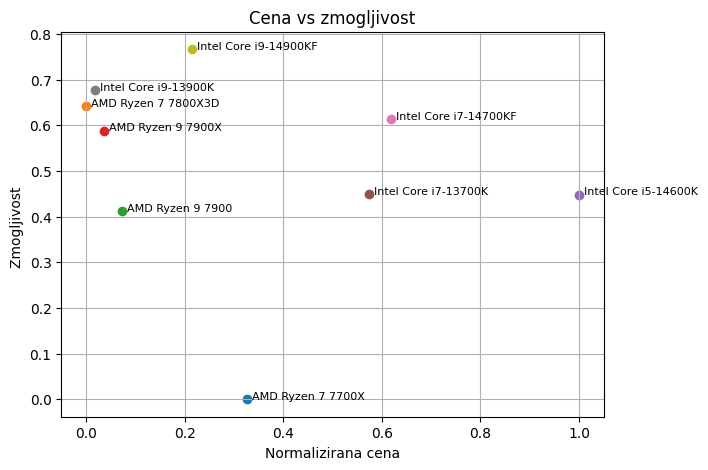

In [84]:
plt.figure(figsize=(7,5))

x = df_norm["cena_skupaj_norm"]
y = 0.5 * df_norm["igre_fps_score_norm"] + 0.5 * df_norm["produktivnost_score_norm"]

for i, row in df_norm.iterrows():
    plt.scatter(x[i], y[i])
    plt.text(x[i]+0.01, y[i], row["ime"], fontsize=8)

plt.xlabel("Normalizirana cena")
plt.ylabel("Zmogljivost ")
plt.title("Cena vs zmogljivost")
plt.grid(True)
plt.show()


Vidi se pa tudi, da ima Intel Core i5-14600K, zelo dobro kombinacijo cene in zmogljivosti. Vidimo, da ni najbolj zmogljiv procesor, in da je Intel Core i7-14700KF je dobra alternativa, če smo pripravljeni plačati malo več. Če dodatnega stroška za AM5 matično ploščo ne bi bilo, verjamem, da AMD-jevi procesorji po razmerju med ceno in zmogljivostjo bi bili precej boljši.

In [85]:
def compute_ranking_for_price_weight(price_weight):
    other = {k: v for k, v in weights.items() if k != "cena_skupaj_norm"}
    factor = (1 - price_weight) / sum(other.values())
    new_weights = {"cena_skupaj_norm": price_weight}
    for k, v in other.items():
        new_weights[k] = v * factor

    scores = (df_norm[[c for c in df_norm.columns if c.endswith("_norm")]] * pd.Series(new_weights)).sum(axis=1)

    idx = scores.idxmax()
    return df_norm.loc[idx, "ime"], scores[idx]

for w in [0.05, 0.10, 0.20, 0.30, 0.40]:
    name, score = compute_ranking_for_price_weight(w)
    print(f"Utež za ceno = {w} -> najboljši CPU: {name} (score={score})")


Utež za ceno = 0.05 -> najboljši CPU: Intel Core i9-14900KF (score=0.5682867965367964)
Utež za ceno = 0.1 -> najboljši CPU: Intel Core i5-14600K (score=0.5502567767214799)
Utež za ceno = 0.2 -> najboljši CPU: Intel Core i5-14600K (score=0.6002282459746487)
Utež za ceno = 0.3 -> najboljši CPU: Intel Core i5-14600K (score=0.6501997152278176)
Utež za ceno = 0.4 -> najboljši CPU: Intel Core i5-14600K (score=0.7001711844809867)


Če nam pa je manj mar za ceno vidimo, da v večini Intel Core i5-14600K, še vedno prevlada, razn če hočmo samo max zmogljivost.

## Kaj če analiza

Če nebi potrebovali zamenjati matične plošče in hladilnika procesroja:

In [94]:
df_whatif = df.copy()

df_whatif.loc[df_whatif["podnozje"] == "AM5", "cena_skupaj"] -= 167

x = df_whatif["cena_skupaj"].astype(float)
df_whatif["cena_skupaj_norm"] = (x.max() - x) / (x.max() - x.min())

for col in df_norm.columns:
    if col.endswith("_norm") and col != "cena_skupaj_norm":
        df_whatif[col] = df_norm[col]

scores = pd.Series(0.0, index=df_whatif.index)
for col, w in weights.items():
    scores += w * df_whatif[col]

df_whatif["skupni_score"] = scores

df_whatif_ranked = df_whatif.sort_values("skupni_score", ascending=False)[["ime", "cena_skupaj", "skupni_score"]]

df_whatif_ranked


,ime,cena_skupaj,skupni_score
2,AMD Ryzen 9 7900,303,0.601029
4,Intel Core i5-14600K,215,0.600228
1,AMD Ryzen 7 7800X3D,323,0.568662
6,Intel Core i7-14700KF,320,0.551848
5,Intel Core i7-13700K,332,0.520552
8,Intel Core i9-14900KF,431,0.509524
3,AMD Ryzen 9 7900X,313,0.493759
7,Intel Core i9-13900K,485,0.429158
0,AMD Ryzen 7 7700X,233,0.388571


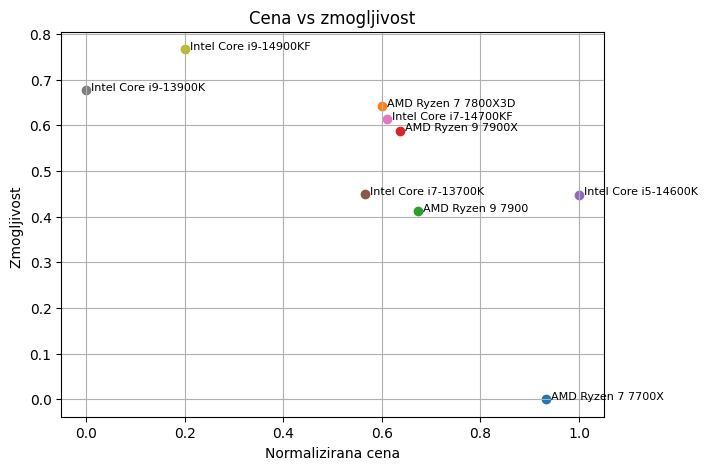

In [97]:
plt.figure(figsize=(7,5))

x = df_whatif["cena_skupaj_norm"]
y = 0.5 * df_whatif["igre_fps_score_norm"] + 0.5 * df_whatif["produktivnost_score_norm"]

for i, row in df_whatif.iterrows():
    plt.scatter(x[i], y[i])
    plt.text(x[i]+0.01, y[i], row["ime"], fontsize=8)

plt.xlabel("Normalizirana cena")
plt.ylabel("Zmogljivost ")
plt.title("Cena vs zmogljivost")
plt.grid(True)
plt.show()

Vidimo, da bi zmagal AMD Ryzen 9 7900 in AMD Ryzen 7 7800X3D bi bil celo na 3. mestu. Na splošno so pa rezultati skupnega scora med ADM in Intel procesorji zelo bližji.

In [91]:
df_whatif = df.copy()

df_whatif.loc[df_whatif["podnozje"] == "AM5", "cena_skupaj"] -= 160

x = df_whatif["cena_skupaj"].astype(float)
df_whatif["cena_skupaj_norm"] = (x.max() - x) / (x.max() - x.min())

for col in df_norm.columns:
    if col.endswith("_norm") and col != "cena_skupaj_norm":
        df_whatif[col] = df_norm[col]

scores = pd.Series(0.0, index=df_whatif.index)
for col, w in weights.items():
    scores += w * df_whatif[col]

df_whatif["skupni_score"] = scores

df_whatif_ranked = df_whatif.sort_values("skupni_score", ascending=False)[["ime", "cena_skupaj", "skupni_score"]]

df_whatif_ranked


,ime,cena_skupaj,skupni_score
4,Intel Core i5-14600K,215,0.600228
2,AMD Ryzen 9 7900,310,0.595844
1,AMD Ryzen 7 7800X3D,330,0.563477
6,Intel Core i7-14700KF,320,0.551848
5,Intel Core i7-13700K,332,0.520552
8,Intel Core i9-14900KF,431,0.509524
3,AMD Ryzen 9 7900X,320,0.488574
7,Intel Core i9-13900K,485,0.429158
0,AMD Ryzen 7 7700X,240,0.383386


Tukaj pa lahko še opazimo, da je razlika za 7 eur že opazljiva, to bi bilo v primeru, da nebi potrebovali dodatnega ogordja za hlajenje procesorja.